In [1]:
!git clone https://github.com/a80-abbasi/DeepLearningAssignments.git
%cd "DeepLearningAssignments/Assignment 4/Q3"

Cloning into 'DeepLearningAssignments'...
remote: Enumerating objects: 164, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 164 (delta 12), reused 77 (delta 10), pack-reused 84
Receiving objects: 100% (164/164), 88.52 MiB | 16.60 MiB/s, done.
Resolving deltas: 100% (32/32), done.
Updating files: 100% (68/68), done.
/content/DeepLearningAssignments/Assignment 4/Q1


# Gathering the Data

In [2]:
!git clone https://github.com/amnghd/Persian_poems_corpus


Cloning into 'Persian_poems_corpus'...
remote: Enumerating objects: 159, done.
remote: Total 159 (delta 0), reused 0 (delta 0), pack-reused 159
Receiving objects: 100% (159/159), 45.21 MiB | 14.70 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (148/148), done.


In [3]:
!pip install hazm
from hazm import *
import string
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.7/316.7 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394485 sha256=7be4a3f235041bab8d90166f4c5045241c8dc1445a8ce78fdcc22dad1b75ba46
  Stored in directory: /root/.cache/pip/wheels/19/1d/3a/0a8c14c30132b4f9ffd796efbb6746f15b3d6bcfc1055a9346
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp38-cp38-linux_x86_64.whl size=180769 sha256=d638d06d9a6f9c938b01a97f5bae4d8dfbbb6e789f9414c9976680015b87de2e
  Stored in directory: /root/.cache/pip/wheels/3c/d8/9f/59fd78b2b7d1e9ffcb68fb6de80c2e7c20b804c8cbc4d8fc23
Successfully built nltk libwapiti
  Attempting unin

In [4]:
dataset_root = Path('Persian_poems_corpus/normalized')
poets = ['saadi',
         'moulavi',
         'hafez',
         'ferdousi',
         'bahar',
         'attar',
         'jami',
         'sanaee',
         'parvin',
         'saeb']
len(poets)

10

In [5]:
label2id = {poet: i for i, poet in enumerate(poets)}
id2label = {i: poet for i, poet in enumerate(poets)}
label_id = {'label2id': label2id, 'id2label': id2label}

In [6]:
dataset = []

for poet in poets:
    print(poet)
    poet_path = dataset_root / f'{poet}_norm.txt'
    with open(poet_path, 'r', encoding='utf-8') as f:
        half_verses = f.read()
    half_verses = [verse.strip() for verse in half_verses.split('\n') if verse.strip()]
    # convert Mesras to Beits
    if len(half_verses) % 2 != 0:
        half_verses = half_verses[:-1]
    verses = []
    for i in range(0, len(half_verses), 2):
        verses.append(f'{half_verses[i]} {half_verses[i+1]}')
    dataset.extend([{'poet': poet, 'verse': verse} for verse in verses])

dataset = pd.DataFrame(dataset)
dataset.head()

saadi
moulavi
hafez
ferdousi
bahar
attar
jami
sanaee
parvin
saeb


,poet,verse
0,saadi,اول دفتر به نام ایزد دانا صانع پروردگار حی توانا
1,saadi,اکبر و اعظم خدای عالم و آدم صورت خوب آفرید و س...
2,saadi,از در بخشندگی و بنده نوازی مرغ هوا را نصیب و م...
3,saadi,قسمت خود می خورند منعم و درویش روزی خود می برن...
4,saadi,حاجت موری به علم غیب بداند در بن چاهی به زیر ص...


In [7]:
stopwords = []
replace_dict = {}
punctuations = '\.:!،؛؟»\]\)\}«\[\(\{' + string.punctuation

with open('stopwords.txt', 'r', encoding='utf-8') as f:
    var = f.readline()
    while var:
        stopwords.append(var.strip())
        var = f.readline()

with open('replace.txt', 'r', encoding='utf-8') as f:
    line = f.readline()
    while line:
        key, value = line.split('-')
        key, value = key.strip(), value.strip()
        replace_dict[f'{key}'] = f'{value}'
        line = f.readline()

In [8]:
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

def replace_function(string):
    if string in replace_dict:
      return replace_dict[string]
    return string

def sent_pre_process(sentence, normalize=True, remove_stopwords=False, stemme=False, lemmatize=True, replace=True, remove_punctuations=True, is_first=True, join=True):

    # replace some charachters
    replace_char = {'هٔ': 'ه',
                    'ۀ' : 'ه',
                    'ه‌ی' : 'ه'}
    
    if remove_punctuations:
      for char in punctuations:
        replace_char[char] = " "

    for key, value in replace_char.items():
        sentence = sentence.replace(key, value)

    if normalize:
        sentence = normalizer.normalize(sentence)
    if stemme:
        sentence = stemmer.stemme(sentence)
    if lemmatize:
        sentence = lemmatizer.lemmatize(sentence)
    

    tokens = word_tokenize(sentence)
    
    if replace:
        tokens = [replace_function(token) for token in tokens]
    if remove_stopwords:
        tokens = [token for token in tokens if token not in stopwords]
    
    if is_first:
        return sent_pre_process(" ".join(tokens), normalize, remove_stopwords, stemme, lemmatize, replace, remove_punctuations, False, join)
    if join:
        return " ".join(tokens)
    return tokens

In [9]:
dataset['processed_verse'] = dataset['verse'].apply(lambda x: sent_pre_process(x))

In [10]:
dataset['label'] = dataset['poet'].apply(lambda x: label2id[x])
dataset.sample(5)

,poet,verse,processed_verse,label
22924,moulavi,دل نگه دارید ای بی حاصلان در حضور حضرت صاحب دلان,دل نگه دارید ای بی حاصلان در حضور حضرت صاحب دلان,1
35630,moulavi,فتنه ها و شورها انگیخته بندگان و خسروان آمیخته,فتنه‌ها و شورها انگیخته بندگان و خسروان آمیخته,1
103563,bahar,در زبان شیخ و شابست ای مشارالسلطنه شکرلله چشم ...,در زبان شیخ و شابست ای مشارالسلطنه شکرلله چشم ...,4
8909,saadi,عجب ماندی ای یار فرخنده رای تو را کشتی آورد و ...,عجب ماندی ای یار فرخنده رای تو را کشتی آورد و ...,0
208802,attar,این چنین ره راه مشتاقان بود تا ابد این راه بی ...,این چنین راه راه مشتاقان بود تا ابد این راه بی...,5


# Dataset, DataLoader, and Model

I am using `HooshvareLab`'s ParsBert to classify our poems.

### Config

In [15]:
!pip install transformers
from transformers import BertConfig, BertTokenizer
from transformers import BertModel, AutoModel

from transformers import AdamW
from transformers import get_linear_schedule_with_warmup


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 65.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 100.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.4 MB/s eta 0:00:00


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [31]:
# general config
MAX_LEN = 32
TRAIN_BATCH_SIZE = 256
VALID_BATCH_SIZE = 256
TEST_BATCH_SIZE = 256

EPOCHS = 3
LEARNING_RATE = 2e-5

MODEL_NAME = 'HooshvareLab/bert-fa-base-uncased'
OUTPUT_PATH = './model.bin'

os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

In [19]:
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
config = BertConfig.from_pretrained(MODEL_NAME, **label_id)
config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "saadi",
    "1": "moulavi",
    "2": "hafez",
    "3": "ferdousi",
    "4": "bahar",
    "5": "attar",
    "6": "jami",
    "7": "sanaee",
    "8": "parvin",
    "9": "saeb"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "attar": 5,
    "bahar": 4,
    "ferdousi": 3,
    "hafez": 2,
    "jami": 6,
    "moulavi": 1,
    "parvin": 8,
    "saadi": 0,
    "saeb": 9,
    "sanaee": 7
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.26.0",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}

### Dataset

In [20]:
sample_idx = np.random.randint(0, len(dataset))
sample_verse = dataset.iloc[sample_idx]['processed_verse']
sample_label = dataset.iloc[sample_idx]['label']

tokens = tokenizer.tokenize(sample_verse)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
encoding = tokenizer.encode_plus(
    sample_verse,
    max_length=32,
    truncation=True,
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=False, # will set True later
    return_attention_mask=False, # will set True later
    padding='max_length',
    return_tensors='pt', 
)

print(f'verse: {sample_verse}\nlabel: {sample_label}\ntokens: {tokens}\ntoken_ids: {token_ids}\nencoding: {encoding}')

verse: از پس آیینه عقل کل را کی ببیند وقت گفت و ماجرا
label: 1
tokens: ['از', 'پس', 'ایینه', 'عقل', 'کل', 'را', 'کی', 'ببیند', 'وقت', 'گفت', 'و', 'ماجرا']
token_ids: [2791, 2965, 20940, 7526, 3142, 2803, 3675, 10717, 4244, 3017, 1379, 6518]
encoding: {'input_ids': tensor([[    2,  2791,  2965, 20940,  7526,  3142,  2803,  3675, 10717,  4244,
          3017,  1379,  6518,     4,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]])}


In [21]:
class TextClassification(torch.utils.data.Dataset):

    def __init__(self, df, text_col, label_col, tokenizer, max_len=32) -> None:
        super().__init__()
        self.df = df
        self.texts = df[text_col].values
        self.labels = df[label_col].values
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        text = self.texts[index]
        label = self.labels[index]

        encoding = self.tokenizer.encode_plus(
            text,
            max_length=self.max_len,
            truncation=True,
            add_special_tokens=True,
            return_token_type_ids=True,
            return_attention_mask=True,
            padding='max_length',
            return_tensors='pt', 
        )
        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

### DataLoaders

In [22]:
def create_data_loader(df, tokenizer, x='processed_verse', y='label', max_len =32, batch_size=64):
    dataset = TextClassification(df, x, y, tokenizer, max_len)
    return torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [32]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(dataset, test_size=0.1, random_state=1, stratify=dataset['label'])
train, val = train_test_split(train, test_size=0.1, random_state=1, stratify=train['label'])

train = train.reset_index(drop=True)
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

In [33]:
train_loader = create_data_loader(train, tokenizer, max_len=MAX_LEN, batch_size=TRAIN_BATCH_SIZE)
val_loader = create_data_loader(val, tokenizer, max_len=MAX_LEN, batch_size=VALID_BATCH_SIZE)
test_loader = create_data_loader(test, tokenizer, max_len=MAX_LEN, batch_size=TEST_BATCH_SIZE)

### Model

In [25]:
class TextClassifier(nn.Module):

    def __init__(self, config):
        super().__init__()
        self.bert = BertModel.from_pretrained(MODEL_NAME)
        self.drop = nn.Dropout(config.hidden_dropout_prob)
        self.fc = nn.Linear(self.bert.config.hidden_size, config.num_labels)

    def forward(self, input_ids, attention_mask, token_type_ids):
        x = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
        )
        pooler_output = x['pooler_output']
        output = self.drop(pooler_output)
        return self.fc(output)

# Training

### Functions:

In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import tqdm

In [27]:
def one_epoch(model, loader, criterion, optimizer=None, epoch='', train=True, set_name='Train', metrics=None):
    total_loss = 0
    N = len(loader.dataset)
    Y = []
    Y_pred = []
    if train:
        model.train()
    else:
        model.eval()

    with torch.set_grad_enabled(train), tqdm.tqdm(enumerate(loader), total=len(loader)) as pbar:
        for i, data_i in pbar:
            if train:
                optimizer.zero_grad()

            text, input_id, attention_mask, token_type_ids, y = data_i.values()
            input_ids, attention_mask, token_type_ids = input_id.to(device), attention_mask.to(device), token_type_ids.to(device)
            y = y.to(device)

            p = model(input_ids, attention_mask, token_type_ids)

            loss = criterion(p, y.long())

            total_loss += loss.item() * len(text)
            pbar.set_description(f'{epoch}: {set_name} Loss: {total_loss / N:.3e}')
            if train:
                loss.backward()
                optimizer.step()

            y_pred = p.argmax(dim=-1)
            Y.append(y.cpu().numpy())
            Y_pred.append(y_pred.cpu().numpy())

    total_loss /= N

    Y = np.concatenate(Y)
    Y_pred = np.concatenate(Y_pred)
    acc = accuracy_score(Y_pred, Y)
    print(f'Accuracy of {set_name} set: {acc}')

    result = {'loss': total_loss, 'accuracy': acc}
    if metrics is not None:
        result.update({metric: metric_func(Y, Y_pred) for metric, metric_func in metrics.items()})

    return result

In [28]:
def train_model(model, dataloaders, num_epochs, criterion, optimizer, model_name='pytroch-model'):
    train_loader, val_loader = dataloaders
    min_val_loss = np.inf

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        result = one_epoch(model, train_loader, criterion, optimizer, epoch, train=True, set_name='Train')
        train_loss = result['loss']
        train_acc = result['accuracy']
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_result = one_epoch(model, val_loader, criterion, epoch=epoch, train=False, set_name='Validation')
        val_loss = val_result['loss']
        val_acc = val_result['accuracy']
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        print('\n', '-' * 60)
        if val_loss < min_val_loss:
            min_val_loss = val_loss
            torch.save(model.state_dict(), f'{model_name}.pt')

    plt.plot(train_losses, label='train')
    plt.plot(val_losses, label='val')
    plt.title('loss history of training and val sets')
    plt.legend()
    plt.show()

    plt.plot(train_accuracies, label='train')
    plt.plot(val_accuracies, label='val')
    plt.title('Accuracy history of training and val sets')
    plt.legend()
    plt.show()

    model.load_state_dict(torch.load(f'{model_name}.pt'))
    return model, min_val_loss

### Training Process

In [ ]:
model1 = TextClassifier(config).to(device)
# Freeze BERT parameters
model1.requires_grad_(False)
model1.fc.requires_grad_(True)

0: Train Loss: 1.708e+00: 100%|██████████| 901/901 [08:17<00:00,  1.81it/s]


Accuracy of Train set: 0.42304806270141787


0: Validation Loss: 1.624e+00: 100%|██████████| 101/101 [00:54<00:00,  1.86it/s]


Accuracy of Validation set: 0.4490377483702229

 ------------------------------------------------------------


1: Train Loss: 1.651e+00: 100%|██████████| 901/901 [08:16<00:00,  1.82it/s]


Accuracy of Train set: 0.4390357097934098


1: Validation Loss: 1.583e+00: 100%|██████████| 101/101 [00:54<00:00,  1.85it/s]


Accuracy of Validation set: 0.4607096849748214

 ------------------------------------------------------------


2: Train Loss: 1.627e+00: 100%|██████████| 901/901 [08:15<00:00,  1.82it/s]


Accuracy of Train set: 0.44768014296062075


2: Validation Loss: 1.560e+00: 100%|██████████| 101/101 [00:54<00:00,  1.86it/s]


Accuracy of Validation set: 0.4675020494203068

 ------------------------------------------------------------


3: Train Loss: 1.612e+00: 100%|██████████| 901/901 [08:14<00:00,  1.82it/s]


Accuracy of Train set: 0.45065993502578583


3: Validation Loss: 1.544e+00: 100%|██████████| 101/101 [00:54<00:00,  1.87it/s]


Accuracy of Validation set: 0.47366982862942575

 ------------------------------------------------------------


4: Train Loss: 1.602e+00: 100%|██████████| 901/901 [08:14<00:00,  1.82it/s]


Accuracy of Train set: 0.45417322698034723


4: Validation Loss: 1.533e+00: 100%|██████████| 101/101 [00:54<00:00,  1.87it/s]


Accuracy of Validation set: 0.476441425615802

 ------------------------------------------------------------


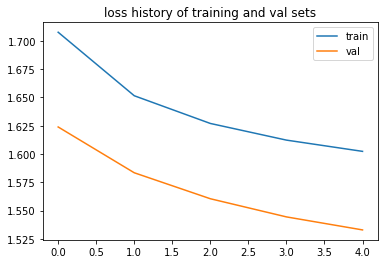

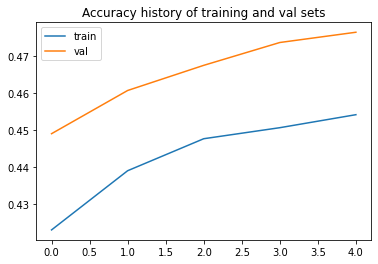

In [35]:
EPOCH = 5
LEARNING_RATE = 2e-4

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model1.parameters()), lr=LEARNING_RATE)

model1, min_val_loss = train_model(model1, (train_loader, val_loader), EPOCH, criterion, optimizer, model_name='bert1')

It seems that we could choose a better learning rate (maybe with scheduler) and achieve better results.
But I am out of GPU, so I will stop here.

# Evaluation

In [36]:
average_policy = 'micro'
metrics = {'accuracy': accuracy_score, 'precision': lambda y1, y2: precision_score(y1, y2, average=average_policy),
           'recall': lambda y1, y2: recall_score(y1, y2, average=average_policy),
           'f1': lambda y1, y2: f1_score(y1, y2, average=average_policy),
           'confusion_matrix': confusion_matrix}

In [41]:
def eval(model, loader, metrics=metrics, set_name='Test', plot_confusion_matrix=True):
    results = one_epoch(model, loader, criterion, train=False, set_name=set_name, metrics=metrics)
    disp = ConfusionMatrixDisplay(results.pop('confusion_matrix'), display_labels=poets)
    if plot_confusion_matrix:
        disp.plot()
    results['perplexity'] = np.exp(results['loss'])
    return results

: Test Loss: 1.545e+00: 100%|██████████| 112/112 [01:00<00:00,  1.84it/s]

Accuracy of Test set: 0.47354553119730186


{'loss': 1.5454392556463352,
 'accuracy': 0.47354553119730186,
 'precision': 0.47354553119730186,
 'recall': 0.47354553119730186,
 'f1': 0.47354553119730186,
 'perplexity': 4.690031297356837}

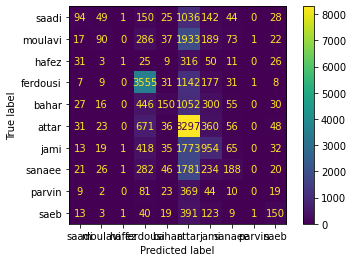

In [42]:
eval(model1, test_loader, set_name='Test')

In [43]:
# eval(model1, val_loader, set_name='Validation')

In [44]:
# eval(model1, train_loader, set_name='Train')

# Training all layers 

### With Adam

In [49]:
model2 = TextClassifier(config).to(device)

EPOCH = 5
LEARNING_RATE = 1e-3

optimizer = torch.optim.AdamW([{'params': model2.fc.parameters(), 'lr': 1e-3}, {'params': model2.bert.parameters(), 'lr': 1e-4}], lr=LEARNING_RATE)

model2, min_val_loss = train_model(model2, (train_loader, val_loader), EPOCH, criterion, optimizer, model_name='bert2')

Some weights of the model checkpoint at HooshvareLab/bert-fa-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
0: Train Loss: 9.135e-01: 100%|██████████| 901/901 [20:10<00:00,  1.34s/it]


Accuracy of Train set: 0.6904225926359666


0: Validation Loss: 7.248e-01: 100%|██████████| 101/101 [00:54<00:00,  1.87it/s]


Accuracy of Validation set: 0.7557481360034353

 ------------------------------------------------------------


1: Train Loss: 5.309e-01: 100%|██████████| 901/901 [20:12<00:00,  1.35s/it]


Accuracy of Train set: 0.822114654764848


1: Validation Loss: 6.728e-01: 100%|██████████| 101/101 [00:54<00:00,  1.85it/s]


Accuracy of Validation set: 0.7878752390990358

 ------------------------------------------------------------


2: Train Loss: 3.604e-01: 100%|██████████| 901/901 [20:20<00:00,  1.35s/it]


Accuracy of Train set: 0.8796762566524834


2: Validation Loss: 7.093e-01: 100%|██████████| 101/101 [00:54<00:00,  1.87it/s]


Accuracy of Validation set: 0.7914275676308701

 ------------------------------------------------------------


3: Train Loss: 2.609e-01: 100%|██████████| 901/901 [20:11<00:00,  1.34s/it]


Accuracy of Train set: 0.9122110751107121


3: Validation Loss: 8.204e-01: 100%|██████████| 101/101 [00:54<00:00,  1.86it/s]


Accuracy of Validation set: 0.7845571300308389

 ------------------------------------------------------------


4: Train Loss: 7.761e-04:   0%|          | 3/901 [00:04<20:02,  1.34s/it]


KeyboardInterrupt: ignored

Its validation loss started to increase, and each epoch took a lot of time. So I stopped it.

In [ ]:
model2.load_state_dict(torch.load(f'bert2.pt'))

: Test Loss: 7.683e-01: 100%|██████████| 112/112 [01:00<00:00,  1.86it/s]


Accuracy of Test set: 0.7936691961776279


{'loss': 0.7683200642860224,
 'accuracy': 0.7936691961776279,
 'precision': 0.7936691961776279,
 'recall': 0.7936691961776279,
 'f1': 0.7936691961776279,
 'perplexity': 2.1561410312443337}

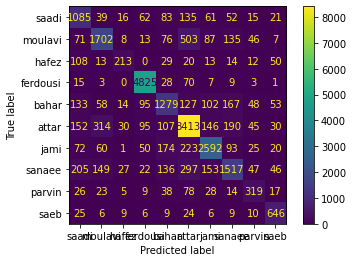

In [50]:
eval(model2, test_loader, set_name='Test')

In [ ]:
# eval(model2, val_loader, set_name='Validation')

In [ ]:
# eval(model2, train_loader, set_name='Train')

# With SGD

Each epoch takes 20 minutes, and I am out of GPUs! So I am not going to train with SGD too!

In [ ]:
# model3 = TextClassifier(config).to(device).load_state_dict(torch.load('bert1.pt'))

# optimizer = torch.optim.AdamW(filter(lambda p: p.requires_grad, model2.parameters()), lr=LEARNING_RATE)
# model1, min_val_loss = train_model(model3, (train_loader, val_loader), EPOCH, criterion, optimizer, model_name='bert3')

# Comparing the Perplexity

In [51]:
model1.load_state_dict(torch.load(f'bert1.pt'))
model2.load_state_dict(torch.load(f'bert2.pt'))

<All keys matched successfully>

In [52]:
_, unbiased_sample = train_test_split(dataset, test_size=1000/len(dataset), random_state=1, stratify=dataset['label'])
loader = create_data_loader(unbiased_sample, tokenizer, max_len=MAX_LEN, batch_size=64)
perp1 = eval(model1, loader, set_name='Unbiased_Sample', plot_confusion_matrix=False)['perplexity']
perp2 = eval(model2, loader, set_name='Unbiased_Sample', plot_confusion_matrix=False)['perplexity']
print(f'Perplexity of before fine-tuining all layers: {perp1:.3f}')
print(f'Perplexity of after fine-tuining all layers: {perp2:.3f}')

: Unbiased_Sample Loss: 1.478e+00: 100%|██████████| 16/16 [00:02<00:00,  7.83it/s]


Accuracy of Unbiased_Sample set: 0.496


: Unbiased_Sample Loss: 6.293e-01: 100%|██████████| 16/16 [00:02<00:00,  7.82it/s]

Accuracy of Unbiased_Sample set: 0.783
Perplexity of before fine-tuining all layers: 4.383
Perplexity of after fine-tuining all layers: 1.876


A Perplexity value about 2, can be approximately interpreted for each verse, model is unsure between 2 poets to choose. But I think it's a pretty good result (considering the task).